In [1]:
# CTRL SHIFT P > create environment 
# raccourci pour créer un venv

In [2]:
#pip install pandas

## Import des données et des librairies

In [39]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
dataframe = pd.read_csv("/home/utilisateur/Documents/DEV-IA/projets/machine_learning_assurance/machinelearning_assurance/data.csv")
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Analyse de chaque variable

### Dimensions du dataframe

In [ ]:
# DATAFRAME ORIGINAL    
dataframe.shape

(1338, 7)

In [ ]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
dataframe.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Recherche de valeurs NaN

In [ ]:
dataframe.isnull().describe()

,age,sex,bmi,children,smoker,region,charges
count,1338,1338,1338,1338,1338,1338,1338
unique,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False
freq,1338,1338,1338,1338,1338,1338,1338


### Valeurs abérrantes et Boxplot

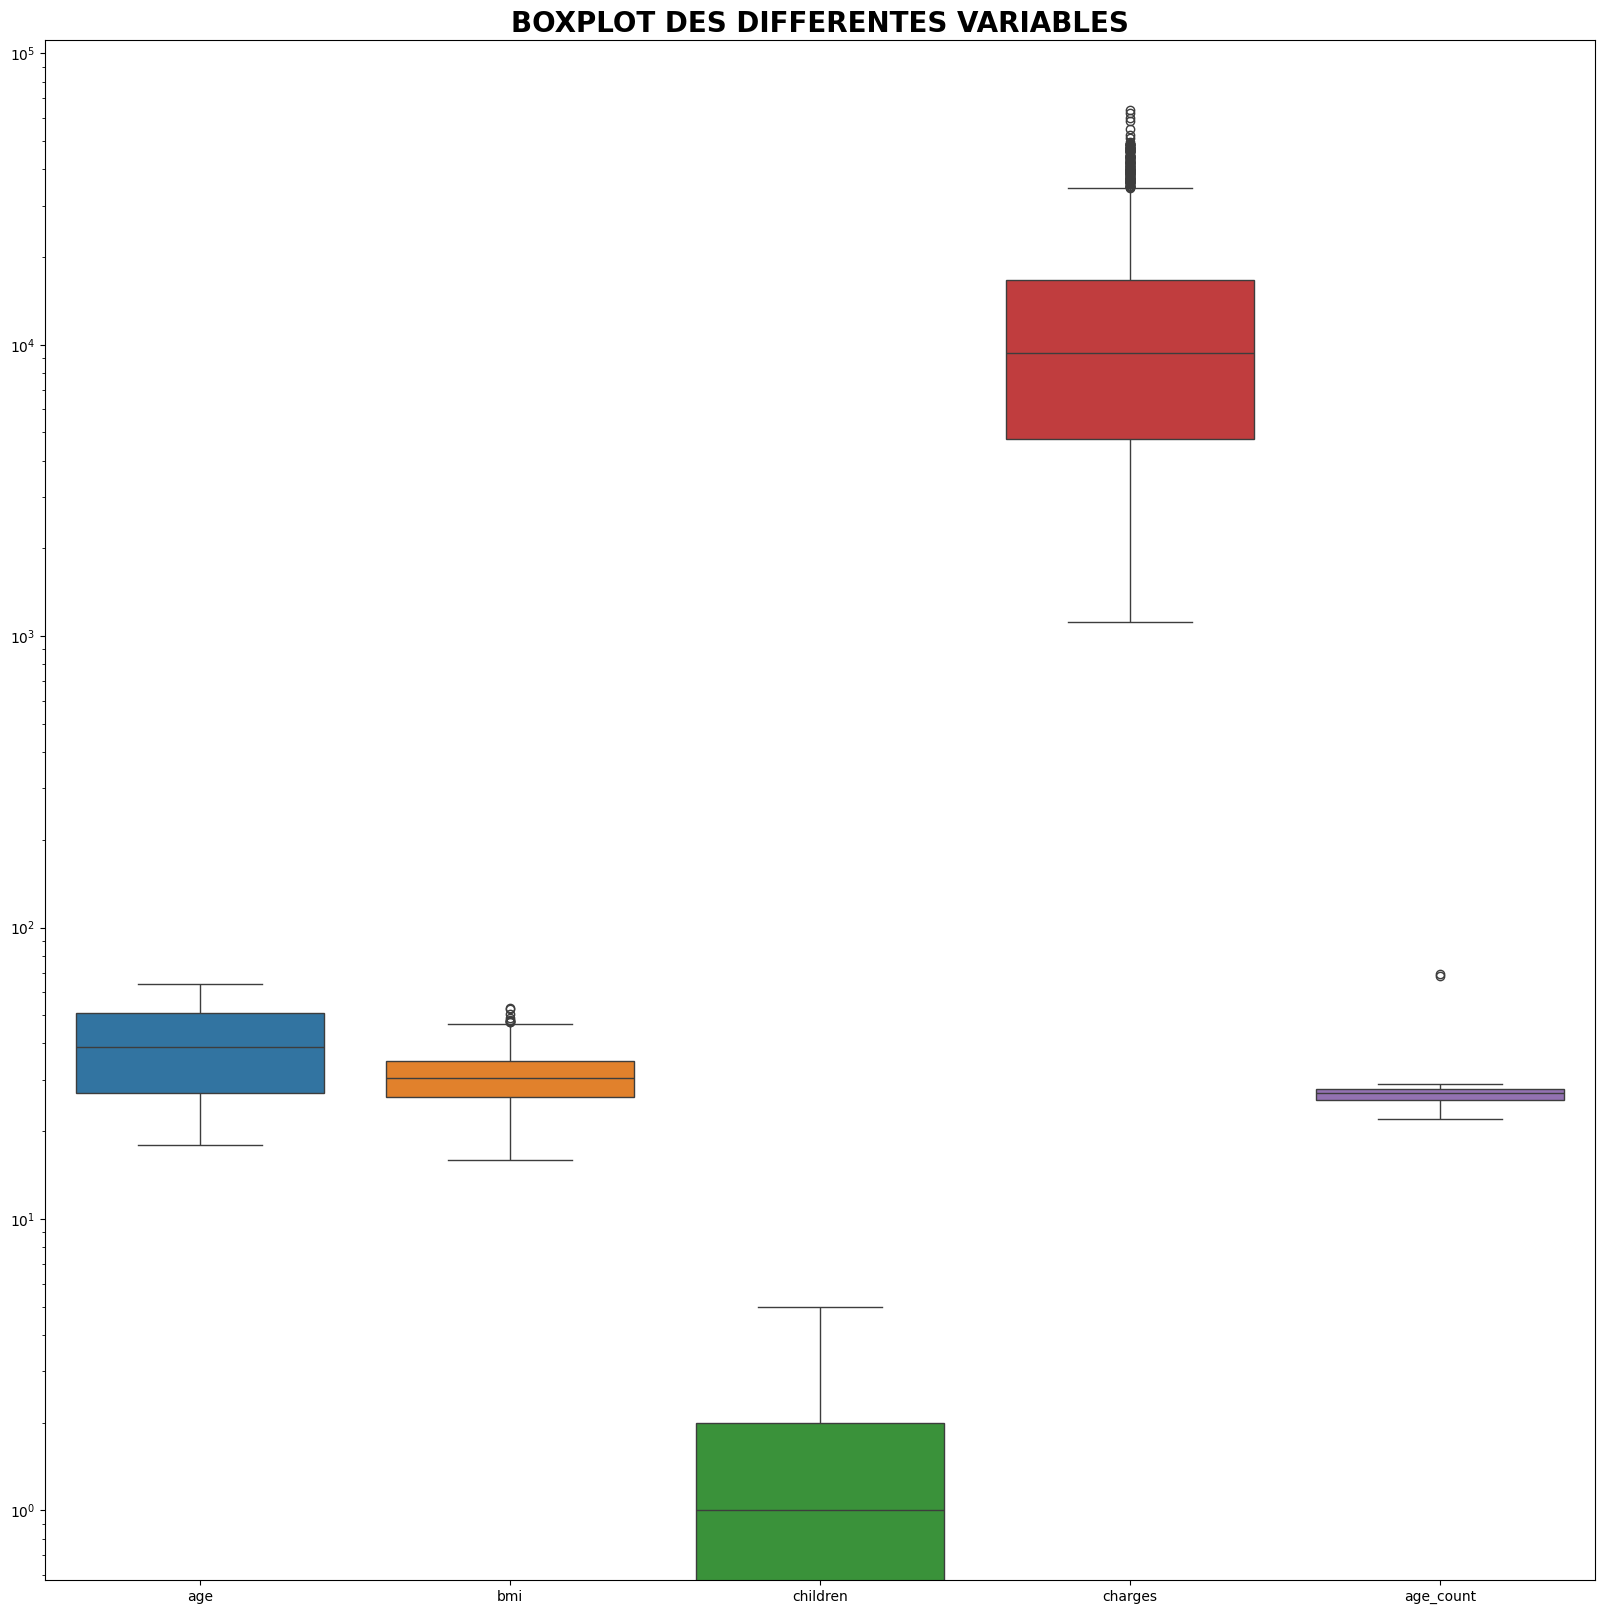

In [197]:
plt.figure(figsize=(20,20))
sns.boxplot(data=dataframe)
plt.yscale("log")

plt.title("BOXPLOT DES DIFFERENTES VARIABLES", fontsize=20, weight="bold")
plt.show()

### variable AGE

In [216]:
dataframe["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [234]:
dataframe["bmi"].value_counts()

bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64

In [254]:
bmi_pb = dataframe["bmi"]
bmi_pb = bmi_pb.drop_duplicates(inplace=True)
bmi_pb 

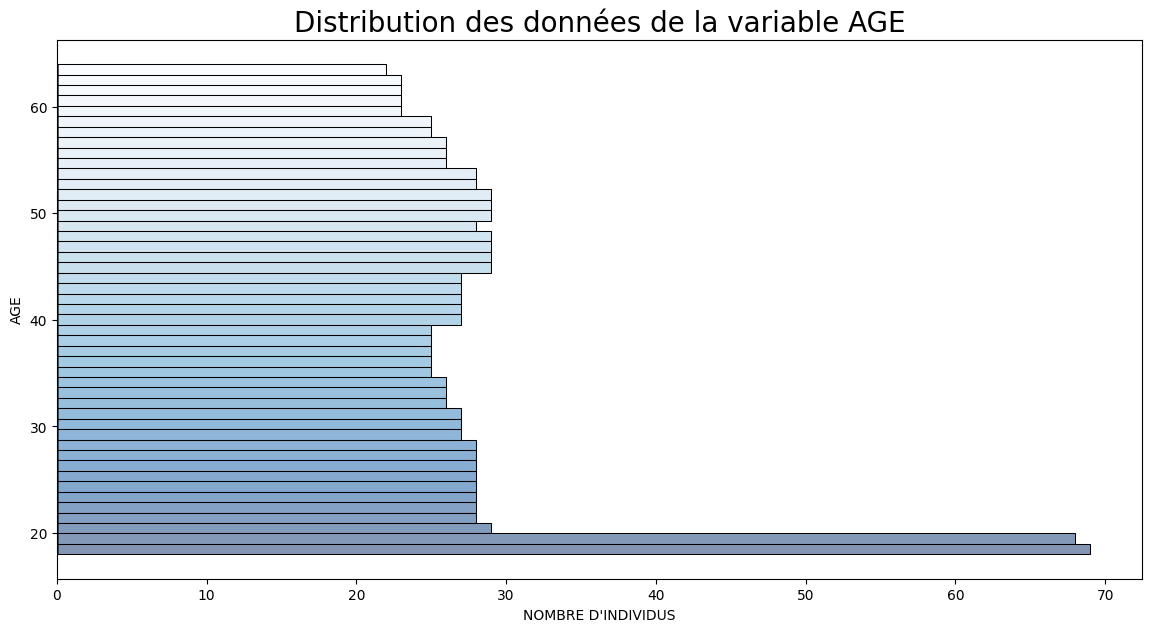

In [217]:
bins = 47
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("AGE")
plt.title("Distribution des données de la variable AGE", fontsize=20)
sns.histplot(dataframe, y="age", bins=bins, hue="age", palette="Blues_r", legend=False)
plt.show()

### variable SEX

In [218]:
dataframe["sex"].describe()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object

In [219]:
hommes = dataframe["sex"] == "male"
nb_hommes = dataframe[hommes]["sex"].count()
nb_femmes = dataframe[~hommes]["sex"].count()
print(f"Total clients : {nb_hommes+nb_femmes}")
print(f"Nombre total d'hommes : {nb_hommes}")
print(f"Nombre total de femmes : {nb_femmes}")

Total clients : 1338
Nombre total d'hommes : 676
Nombre total de femmes : 662


### variable BMI : Indice de masse corporel

In [220]:
dataframe["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

### variable CHILDREN

In [221]:
dataframe["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

In [230]:
dataframe["children"].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

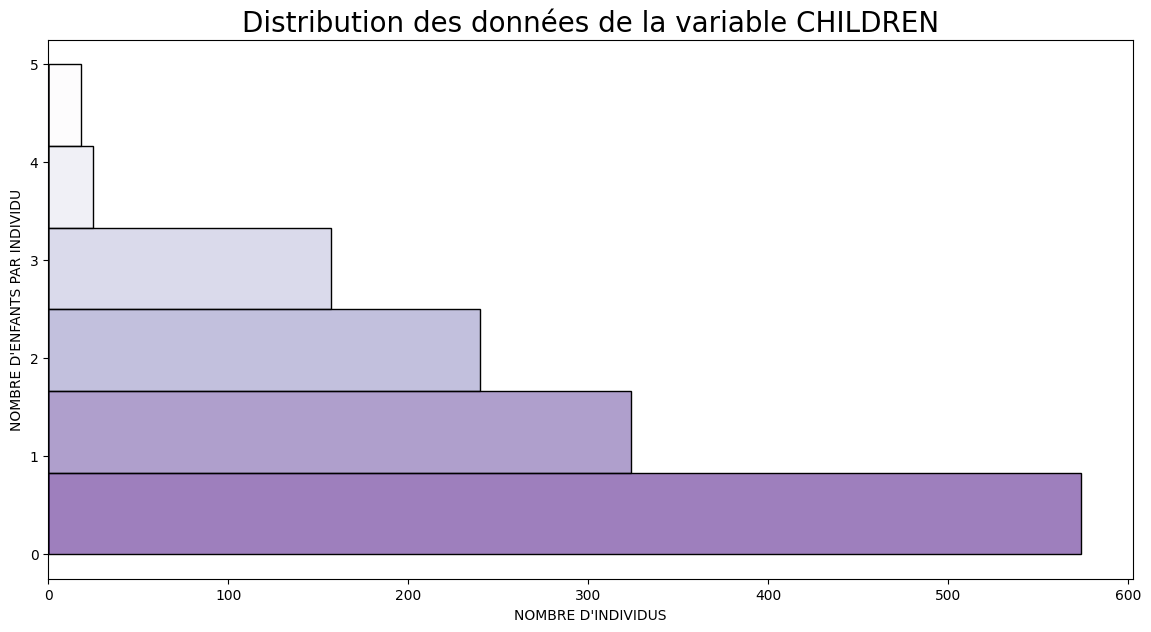

In [259]:
bins = len(dataframe["children"].value_counts())
plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("NOMBRE D'ENFANTS PAR INDIVIDU")
plt.title("Distribution des données de la variable CHILDREN", fontsize=20)
sns.histplot(dataframe, y="children", bins=bins, hue="children", palette="Purples_r", legend=False)
plt.show()

### variable SMOKER

In [223]:
dataframe["smoker"].describe()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object

In [257]:
# FAIRE UN PIE CHART

### variable REGION

In [224]:
dataframe["region"].describe()

count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object

In [300]:
reg = dataframe.groupby("region").count()
reg = reg.reset_index("region")
reg = reg[["region", "age"]]
reg

,region,age
0,northeast,324
1,northwest,325
2,southeast,364
3,southwest,325


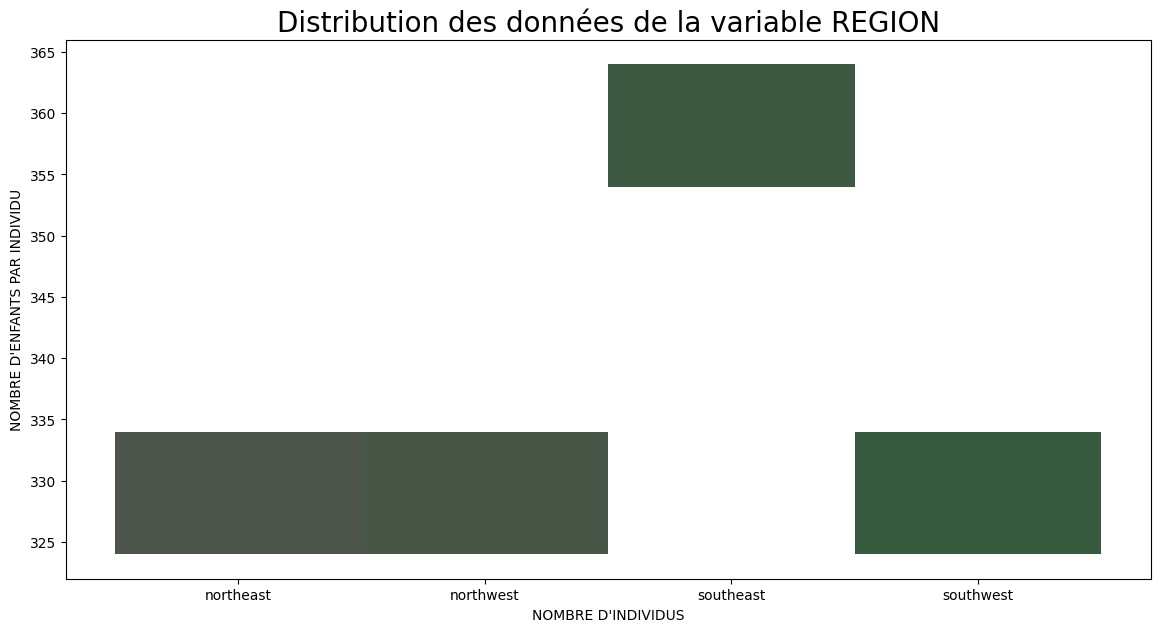

In [304]:
bins = len(reg.value_counts())

plt.figure(figsize=(14,7))
plt.xlabel("NOMBRE D'INDIVIDUS")
plt.ylabel("NOMBRE D'ENFANTS PAR INDIVIDU")
plt.title("Distribution des données de la variable REGION", fontsize=20)
sns.histplot(reg, x="region", y="age", hue="region", palette="Greens", legend=False)
plt.show()

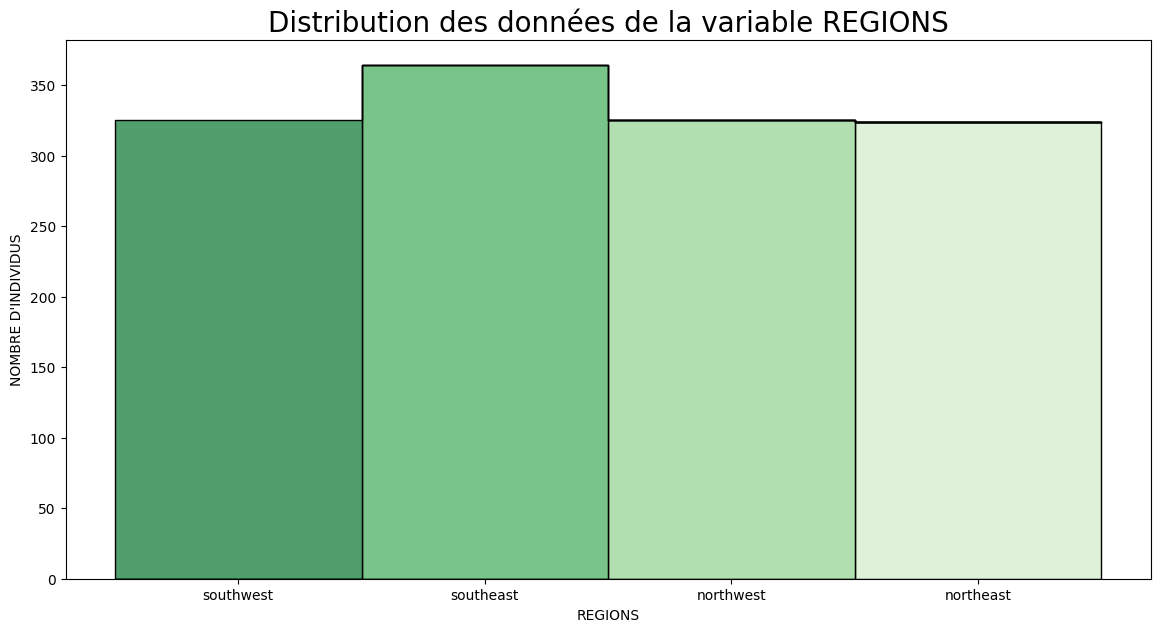

In [333]:
bins = len(reg.value_counts())
plt.figure(figsize=(14,7))
plt.ylabel("NOMBRE D'INDIVIDUS")
plt.xlabel("REGIONS")
plt.title("Distribution des données de la variable REGIONS", fontsize=20)
sns.histplot(dataframe, x="region", hue="region", palette="Greens_r", legend=False, binwidth=5, element="step", multiple="stack")
plt.show()

(array([325.,   0.,   0., 364.,   0.,   0., 325.,   0.,   0., 324.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

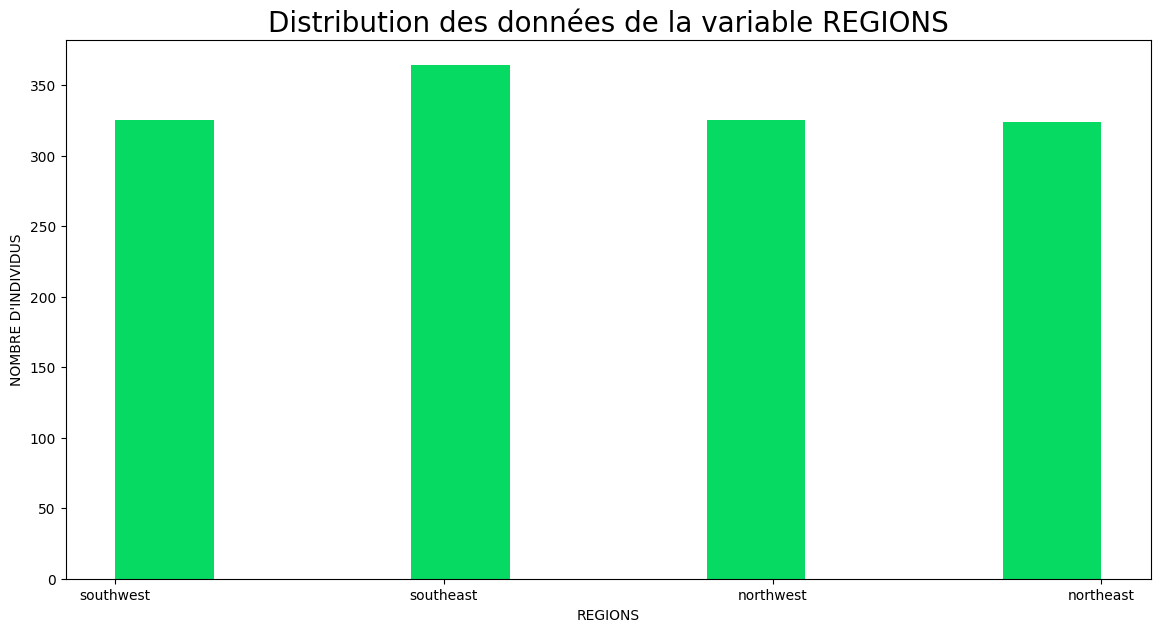

In [348]:
plt.figure(figsize=(14,7))
plt.ylabel("NOMBRE D'INDIVIDUS")
plt.xlabel("REGIONS")
plt.title("Distribution des données de la variable REGIONS", fontsize=20)
plt.hist(dataframe["region"], color="#07da63")


### variable CHARGES

In [225]:
dataframe["charges"].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64